In [1]:
%load_ext autoreload
%autoreload 2
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

MPL_CUSTOM = {
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.dpi': 120,
    'figure.figsize': (4, 3.5),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'xtick.minor.visible': True,
    'ytick.right': True,
    'ytick.direction': 'in',
    'ytick.minor.visible': True,
}

for k, v in MPL_CUSTOM.items():
    mpl.rcParams[k] = v

In [2]:
project_dir = Path(os.environ['CONDA_PREFIX']).parent.absolute()
current_dir = project_dir / 'scratch/ana/result/kyotoMinBias'

In [3]:
filename = current_dir / 'minBiasM1.txt'
df = pd.read_csv(str(filename), sep=r'\s+', header=None, names=['Mch', 'count', 'P(Mch>=x)'])
df_multi = pd.DataFrame({
    'x': df['Mch'],
    'y': df['count'],
})

df_centrality = pd.DataFrame({
    'x': df['Mch'],
    'y': df['P(Mch>=x)'],
})


In [4]:
df_centrality = df_centrality.query('x >= 1')
df_centrality.x = df_centrality['x'] - 0.5

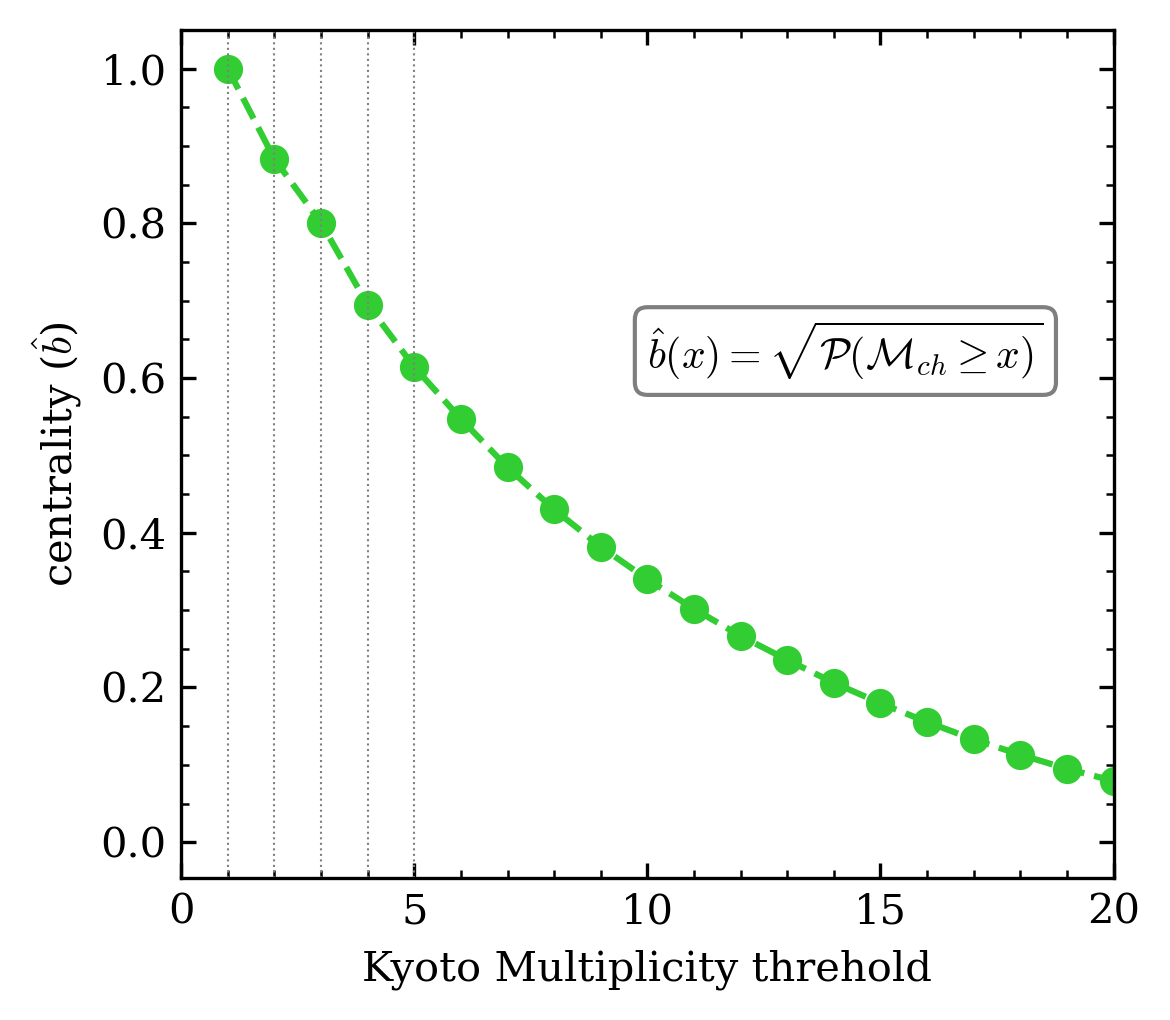

In [5]:
color = 'limegreen'
linestyle = '--'
marker = 'o'

fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
ax.plot(
    df_centrality.x, 
    np.sqrt(df_centrality.y ), 
    color=color,
    linestyle=linestyle,
    marker=marker,
)

ax.set_xlim(0, 20)

for x in df_centrality.x.values[:5]:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.5)

ax.set_xlabel('Kyoto Multiplicity threhold')
ax.set_ylabel(r'centrality ($\hat{b}$)')

ax.annotate(
    r'$\hat{b}(x) = \sqrt{\mathcal{P}(\mathcal{M}_{ch} \geq x)} $',
    xy=(0.5, 0.5), xycoords='axes fraction',
    xytext=(0.5, 0.6), textcoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
)

fig.tight_layout()
plt.show()

In [6]:
# Nbeam = 20774809 from scaler (SBT)
bmax = 13.34 # nmin \ge 1
bmax_sca = 11.74 # scaler (SBT and Kyoto and no AC OR and no Katana OR)


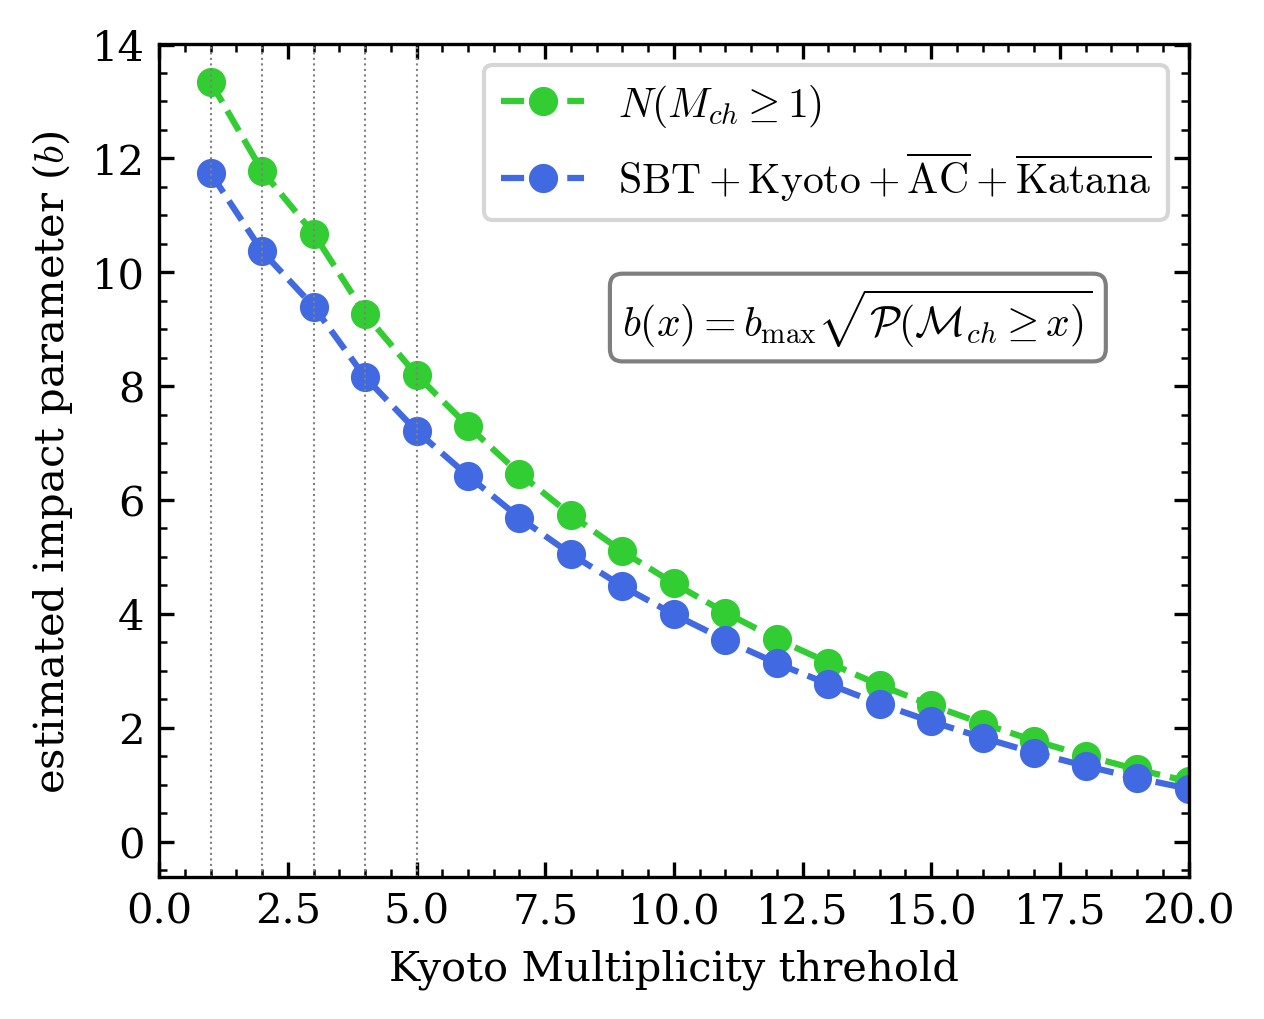

In [17]:
color = 'limegreen'
linestyle = '--'
marker = 'o'

fig, ax = plt.subplots(figsize=(4.25,3.5), dpi=300)
ax.plot(
    df_centrality.x, 
    bmax * np.sqrt(df_centrality.y ), 
    color='limegreen',
    linestyle=linestyle,
    marker=marker,
    label=r'$N(M_{ch}\geq 1)$',
)

ax.plot(
    df_centrality.x, 
    bmax_sca * np.sqrt(df_centrality.y ), 
    color='royalblue',
    linestyle=linestyle,
    marker=marker,
    label=r'$\mathrm{SBT} + \mathrm{Kyoto} + \overline{\mathrm{AC}} + \overline{\mathrm{Katana}}$',
)

ax.set_xlim(0, 20)

for x in df_centrality.x.values[:5]:
    ax.axvline(x, color='gray', linestyle=':', linewidth=0.5)

ax.set_xlabel('Kyoto Multiplicity threhold')
ax.set_ylabel(r'estimated impact parameter ($b$)')
ax.legend()

ax.annotate(
    r'$b(x) = b_{\mathrm{max}}\sqrt{\mathcal{P}(\mathcal{M}_{ch} \geq x)} $',
    xy=(0.3, 0.75), xycoords='axes fraction',
    xytext=(0.45, 0.65), textcoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
)

fig.tight_layout()
plt.show()

(0.0, 25.0)

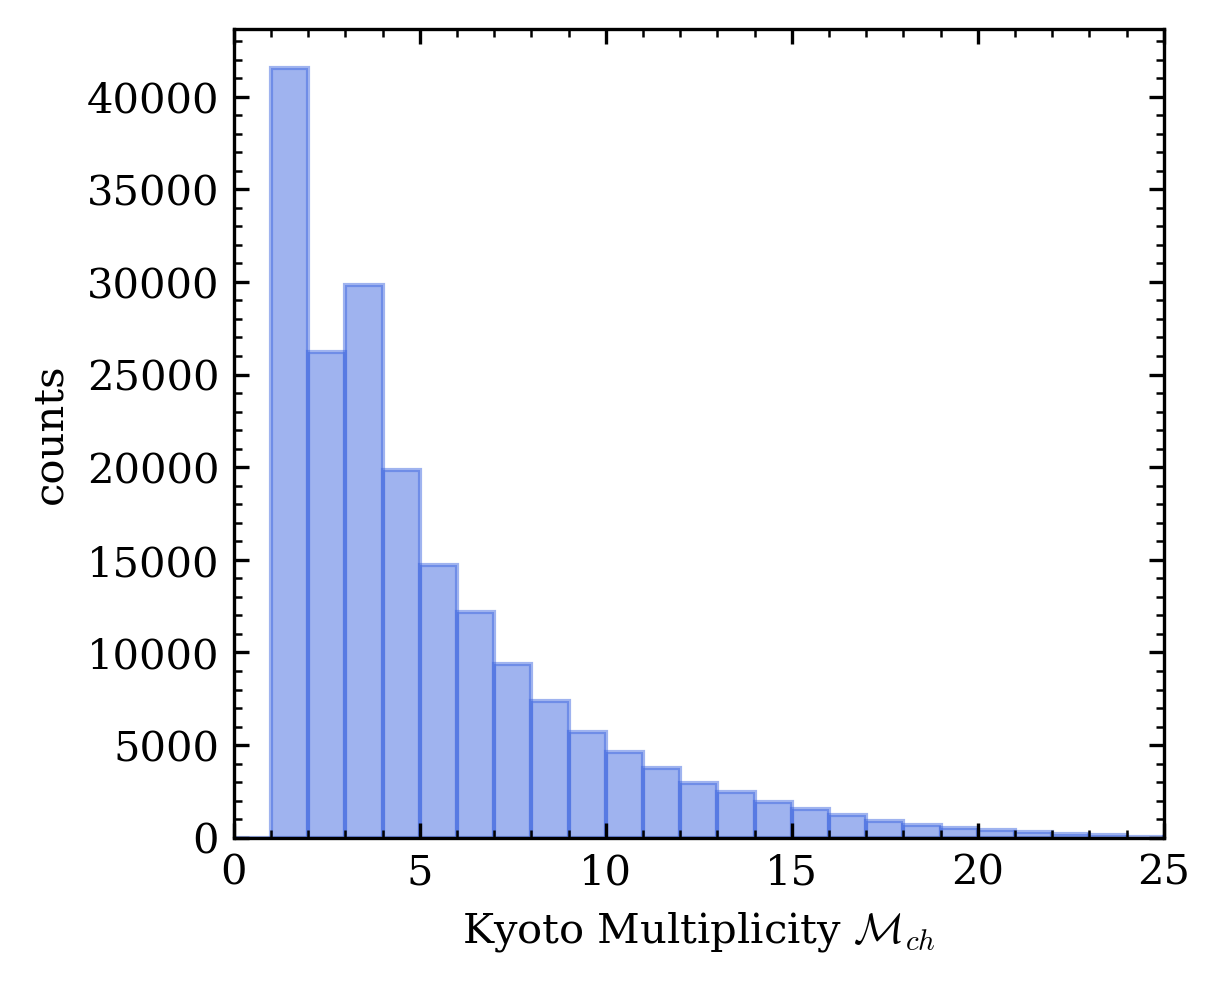

In [8]:
fig, ax = plt.subplots(figsize=(4,3.5), dpi=300)
ax.hist(
    df_multi.x, 
    weights = df_multi.y, 
    color='royalblue',
    bins = 30,
    range= (0, 30),
    histtype='bar',
    alpha=0.5,
    edgecolor='royalblue',
)

ax.set_xlabel(r'Kyoto Multiplicity $\mathcal{M}_{ch}$')
ax.set_ylabel('counts')
ax.set_xlim(0,25)
